In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

import warnings # To suppress some warnings
 
# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# EDA

## Chance of Heart Attack

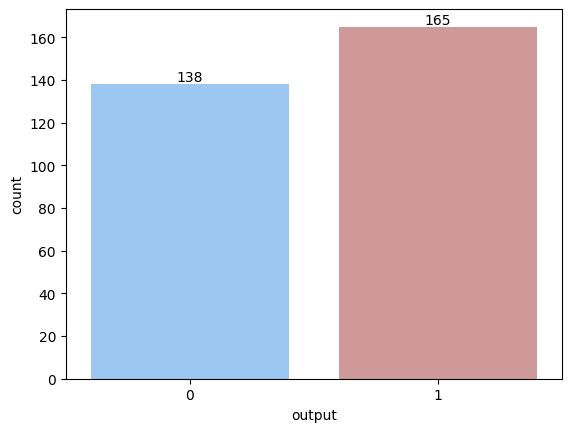

In [5]:
ax = sns.countplot(data=df, x="output", alpha = 0.5, palette=['dodgerblue', 'firebrick'])
ax.bar_label(ax.containers[0], fontsize=10);

## Age

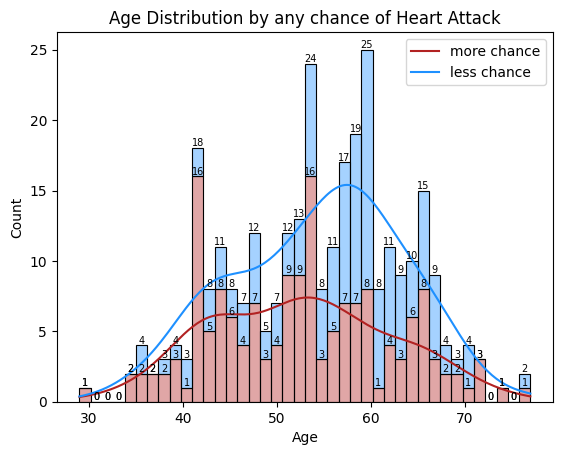

In [6]:
ax = sns.histplot(data=df, x='age', hue='output', bins=40, alpha=0.4, palette=['dodgerblue', 'firebrick'], multiple='stack', kde=True)
ax.bar_label(ax.containers[0], fontsize=7);
ax.bar_label(ax.containers[1], fontsize=7);

plt.title('Age Distribution by any chance of Heart Attack')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(labels=['more chance','less chance'])
plt.show()

## Gender

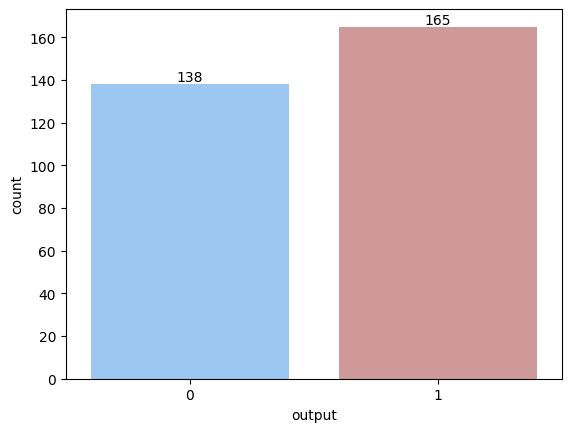

In [7]:
ax = sns.countplot(data=df, x="output", alpha = 0.5, palette=['dodgerblue', 'firebrick'])
ax.bar_label(ax.containers[0], fontsize=10);

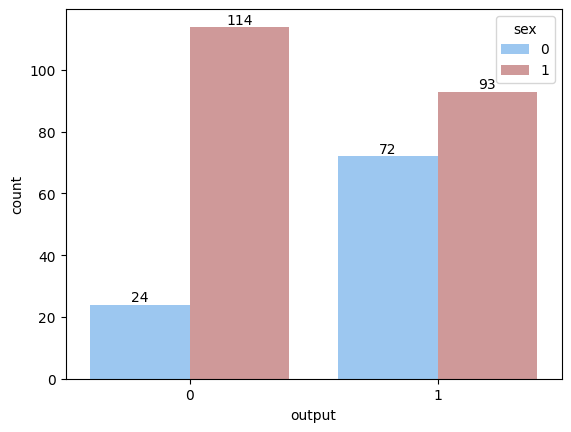

In [8]:
ax = sns.countplot(df, x="output", hue="sex", alpha = 0.5, palette=['dodgerblue', 'firebrick'])
ax.bar_label(ax.containers[0], fontsize=10);
ax.bar_label(ax.containers[1], fontsize=10);

## trtbps : resting blood pressure (in mm Hg)

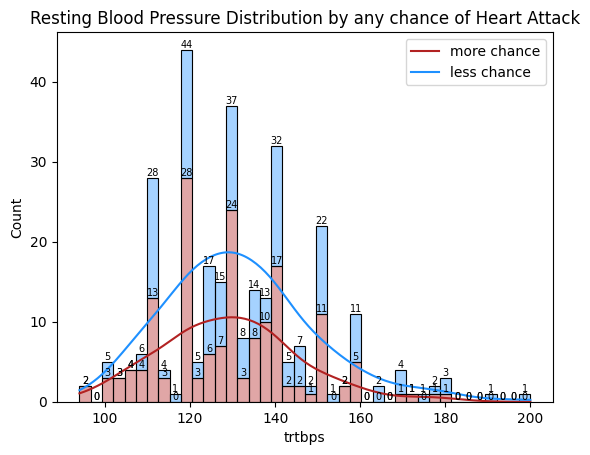

In [9]:
ax = sns.histplot(data=df, x='trtbps', hue='output', bins=40, alpha=0.4, palette=['dodgerblue', 'firebrick'], multiple='stack', kde=True)
ax.bar_label(ax.containers[0], fontsize=7);
ax.bar_label(ax.containers[1], fontsize=7);

plt.title('Resting Blood Pressure Distribution by any chance of Heart Attack')
plt.xlabel('trtbps')
plt.ylabel('Count')
plt.legend(labels=['more chance','less chance'])
plt.show()

## chol : cholestoral in mg/dl fetched via BMI sensor

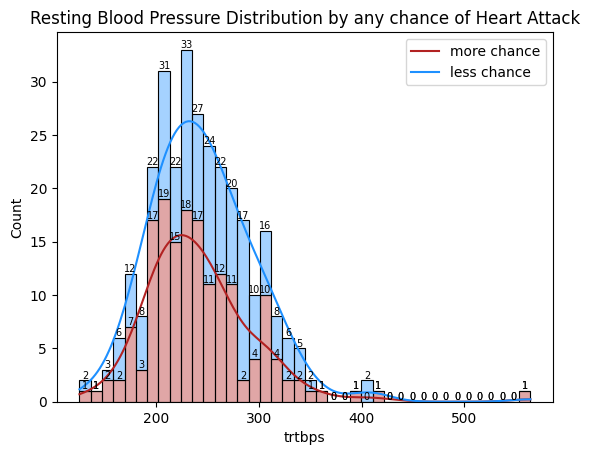

In [10]:
ax = sns.histplot(data=df, x='chol', hue='output', bins=40, alpha=0.4, palette=['dodgerblue', 'firebrick'], multiple='stack', kde=True)
ax.bar_label(ax.containers[0], fontsize=7, );
ax.bar_label(ax.containers[1], fontsize=7);

plt.title('Resting Blood Pressure Distribution by any chance of Heart Attack')
plt.xlabel('trtbps')
plt.ylabel('Count')
plt.legend(labels=['more chance','less chance'])
plt.show()

## fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

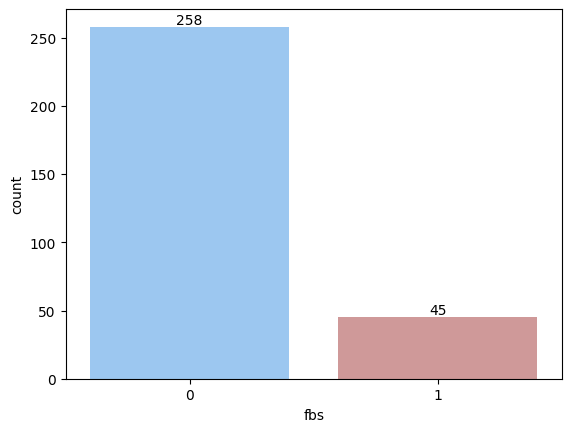

In [11]:
ax = sns.countplot(data=df, x="fbs", alpha = 0.5, palette=['dodgerblue', 'firebrick'])
ax.bar_label(ax.containers[0], fontsize=10);

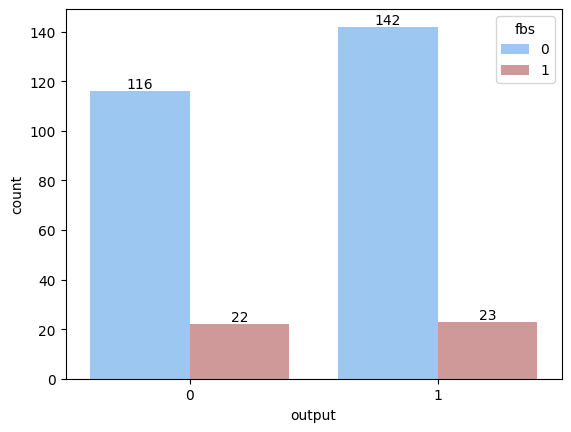

In [12]:
ax = sns.countplot(df, x="output", hue="fbs", alpha = 0.5, palette=['dodgerblue', 'firebrick'])
ax.bar_label(ax.containers[0], fontsize=10);
ax.bar_label(ax.containers[1], fontsize=10);

## rest_ecg : resting electrocardiographic results

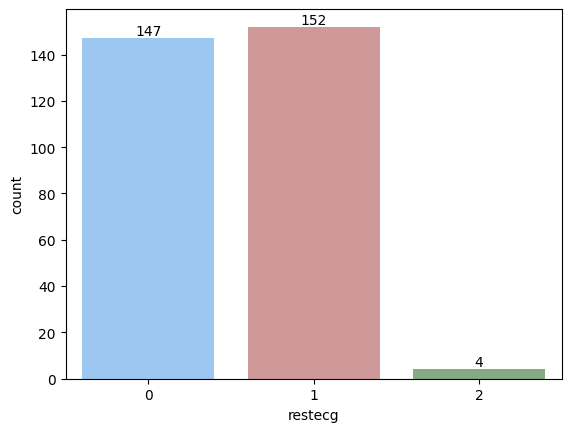

In [13]:
ax = sns.countplot(data=df, x="restecg", alpha = 0.5, palette=['dodgerblue', 'firebrick', 'darkgreen'])
ax.bar_label(ax.containers[0], fontsize=10);

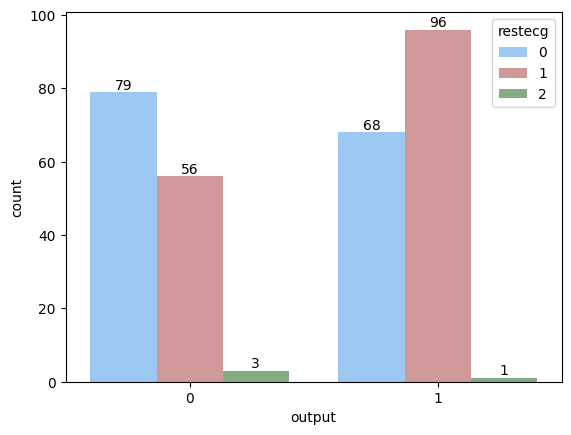

In [14]:
ax = sns.countplot(df, x="output", hue="restecg", alpha = 0.5, palette=['dodgerblue', 'firebrick',"darkgreen"])
ax.bar_label(ax.containers[0], fontsize=10);
ax.bar_label(ax.containers[1], fontsize=10);
ax.bar_label(ax.containers[2], fontsize=10);

## thalachh

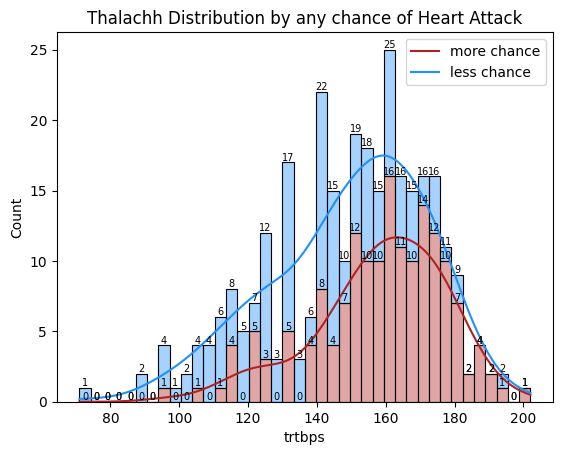

In [15]:
ax = sns.histplot(data=df, x='thalachh', hue='output', bins=40, alpha=0.4, palette=['dodgerblue', 'firebrick'], multiple='stack', kde=True)
ax.bar_label(ax.containers[0], fontsize=7, );
ax.bar_label(ax.containers[1], fontsize=7);

plt.title('Thalachh Distribution by any chance of Heart Attack')
plt.xlabel('trtbps')
plt.ylabel('Count')
plt.legend(labels=['more chance','less chance'])
plt.show()

## exng

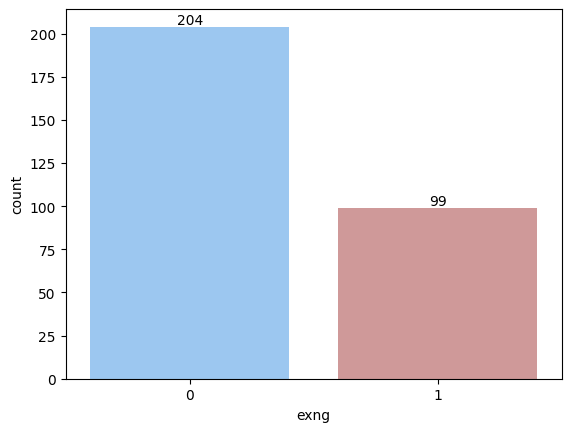

In [16]:
ax = sns.countplot(data=df, x="exng", alpha = 0.5, palette=['dodgerblue', 'firebrick'])
ax.bar_label(ax.containers[0], fontsize=10);

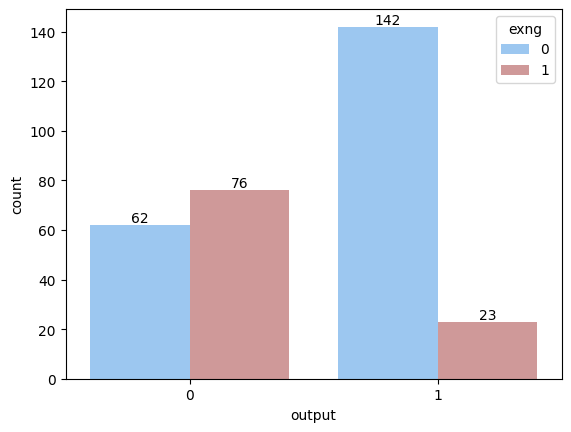

In [17]:
ax = sns.countplot(df, x="output", hue="exng", alpha = 0.5, palette=['dodgerblue', 'firebrick'])
ax.bar_label(ax.containers[0], fontsize=10);
ax.bar_label(ax.containers[1], fontsize=10);

## oldpeak

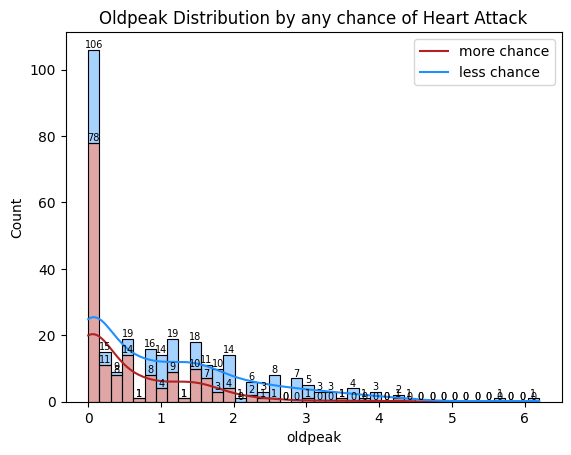

In [18]:
ax = sns.histplot(data=df, x='oldpeak', hue='output', bins=40, alpha=0.4, palette=['dodgerblue', 'firebrick'], multiple='stack', kde=True)
ax.bar_label(ax.containers[0], fontsize=7, );
ax.bar_label(ax.containers[1], fontsize=7);

plt.title('Oldpeak Distribution by any chance of Heart Attack')
plt.xlabel('oldpeak')
plt.ylabel('Count')
plt.legend(labels=['more chance','less chance'])
plt.show()

## slp

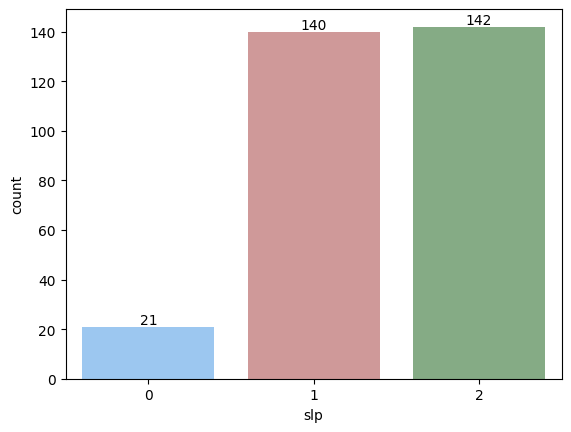

In [19]:
ax = sns.countplot(data=df, x="slp", alpha = 0.5, palette=['dodgerblue', 'firebrick', 'darkgreen'])
ax.bar_label(ax.containers[0], fontsize=10);

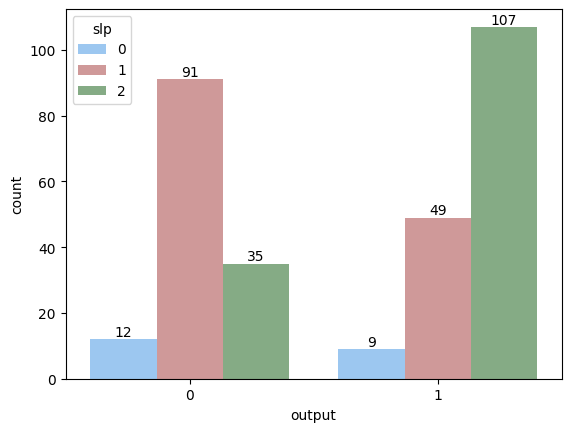

In [20]:
ax = sns.countplot(df, x="output", hue="slp", alpha = 0.5, palette=['dodgerblue', 'firebrick',"darkgreen"])
ax.bar_label(ax.containers[0], fontsize=10);
ax.bar_label(ax.containers[1], fontsize=10);
ax.bar_label(ax.containers[2], fontsize=10);

## caa

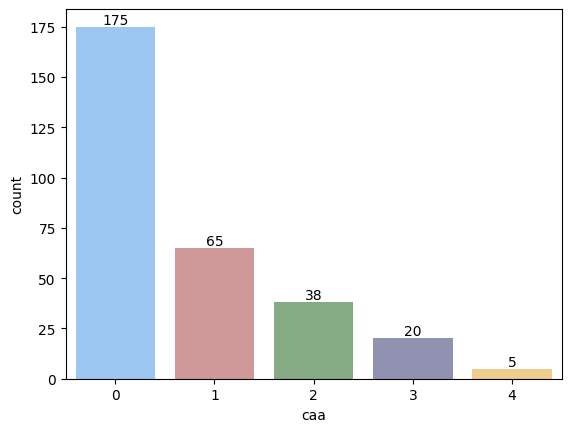

In [21]:
ax = sns.countplot(data=df, x="caa", alpha = 0.5, palette=['dodgerblue', 'firebrick',"darkgreen", "midnightblue", "orange"])
ax.bar_label(ax.containers[0], fontsize=10);

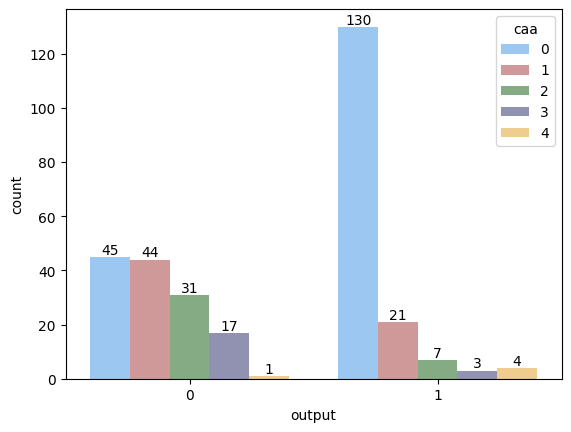

In [22]:
ax = sns.countplot(df, x="output", hue="caa", alpha = 0.5, palette=['dodgerblue', 'firebrick',"darkgreen", "midnightblue", "orange"])
ax.bar_label(ax.containers[0], fontsize=10);
ax.bar_label(ax.containers[1], fontsize=10);
ax.bar_label(ax.containers[2], fontsize=10);
ax.bar_label(ax.containers[3], fontsize=10);
ax.bar_label(ax.containers[4], fontsize=10);

## thall

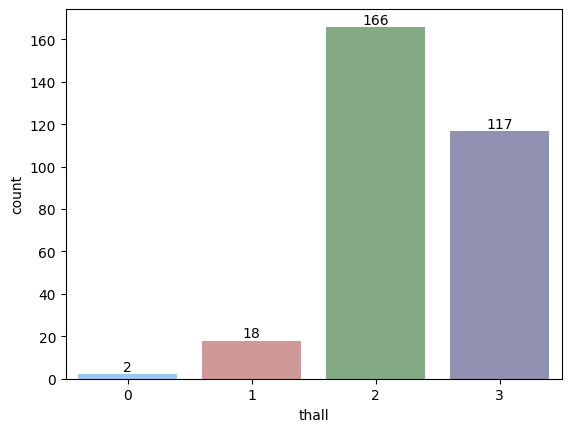

In [23]:
ax = sns.countplot(data=df, x="thall", alpha = 0.5, palette=['dodgerblue', 'firebrick',"darkgreen", "midnightblue"])
ax.bar_label(ax.containers[0], fontsize=10);

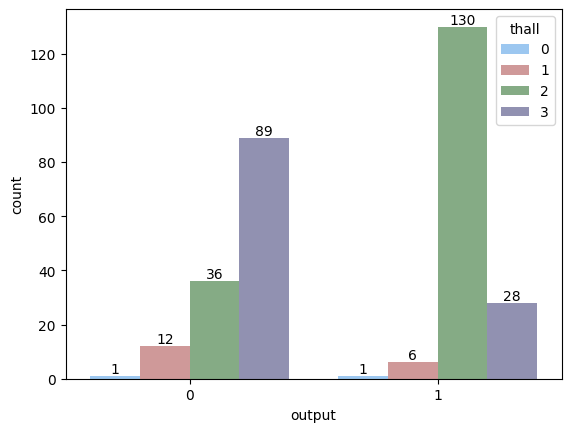

In [24]:
ax = sns.countplot(df, x="output", hue="thall", alpha = 0.5, palette=['dodgerblue', 'firebrick',"darkgreen", "midnightblue"])
ax.bar_label(ax.containers[0], fontsize=10);
ax.bar_label(ax.containers[1], fontsize=10);
ax.bar_label(ax.containers[2], fontsize=10);
ax.bar_label(ax.containers[3], fontsize=10);

## Correlation Matrix and Relations

<Axes: >

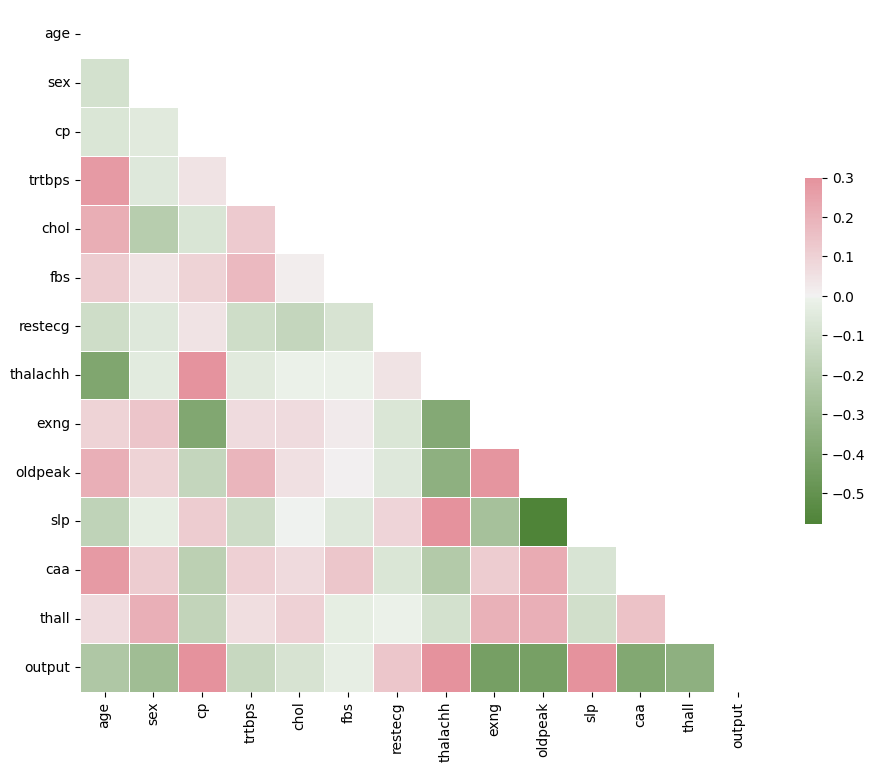

In [25]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(120, 8, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

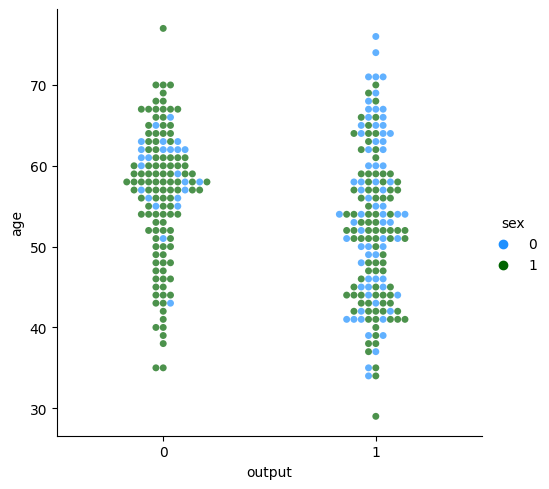

In [26]:
sns.catplot(data=df, x="output", y="age", hue="sex", kind="swarm", palette=['dodgerblue', 'darkgreen'], alpha = 0.7)

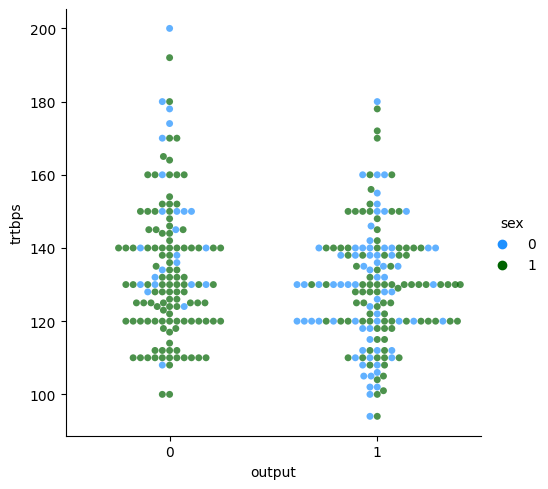

In [27]:
sns.catplot(data=df, x="output", y="trtbps", hue="sex", kind="swarm",palette=['dodgerblue', 'darkgreen'], alpha = 0.7)

# Feature Engineering

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop(columns='output', axis=1).copy()
y = df['output'].copy()

In [30]:
numeric_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

In [31]:
X['age_thalachh_ratio'] = X['age'] / X['thalachh']

In [32]:
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = polynomial_features.fit_transform(X[numeric_features])

In [33]:
pattern = '|'.join(numeric_features)  # 'age|trtbps|chol|thalachh|oldpeak' 

poly_features = df.filter(regex=pattern)

In [34]:
scaler = StandardScaler()
X[poly_features.columns] = scaler.fit_transform(X[poly_features.columns])

In [35]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,age_thalachh_ratio
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,0.420000
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,0.197861
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,0.238372
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,0.314607
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,0.349693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0,0,0.478391,-0.101730,0,1,-1.165281,1,-0.724323,1,0,3,0.463415
299,-1.033002,1,3,-1.234996,0.342756,0,1,-0.771706,0,0.138373,1,0,3,0.340909
300,1.503641,1,0,0.706843,-1.029353,1,1,-0.378132,0,2.036303,1,2,3,0.482270
301,0.290464,1,0,-0.092738,-2.227533,0,1,-1.515125,1,0.138373,1,1,3,0.495652


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix
from sklearn.linear_model import SGDClassifier

## ```Building Logistic Regression model with Stochastic Gradient Descent```

``` Let's set different penalty hyperparameters.```

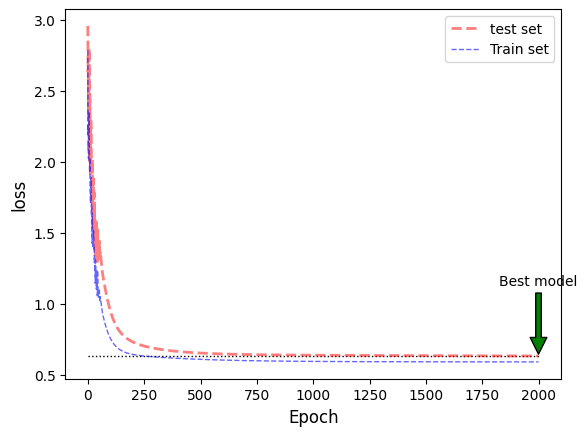

min loss score :  0.63
number of epoch :  1999


In [38]:
sgd_clf_l1 = SGDClassifier(loss='log_loss', penalty = "l1", max_iter=500, random_state = 42, eta0 = 0.01, learning_rate= "optimal", early_stopping = False)

n_epochs = 2000
train_loss, test_loss = [], []

for epoch in range(n_epochs):
    sgd_clf_l1.partial_fit(X_train, y_train, classes = np.unique(y_train))
    
    train_pred = sgd_clf_l1.predict_proba(X_train)
    test_pred  = sgd_clf_l1.predict_proba(X_test)
    
    train_loss.append(log_loss(y_train, train_pred))
    test_loss.append(log_loss(y_test, test_pred))

best_epoch = np.argmin(test_loss)
best_test_loss = round(np.sqrt(test_loss[best_epoch]), 2)

plt.annotate('Best model',
             xy=(best_epoch, best_test_loss),
             xytext=(best_epoch, best_test_loss + 0.5),
             ha="center",
             arrowprops=dict(facecolor='green', shrink=0.03),
             fontsize=10,
            )

plt.plot([0, n_epochs], [best_test_loss, best_test_loss], "k:", linewidth=1)
plt.plot(np.sqrt(test_loss),  "r--",  linewidth=2, label="test set",  alpha = 0.5)
plt.plot(np.sqrt(train_loss), "b--", linewidth=1, label="Train set", alpha = 0.6)
plt.legend(loc="upper right", fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("loss",  fontsize=12)
plt.show()

l1_best_epoch = best_epoch

print("min loss score : ", best_test_loss)
print("number of epoch : ", best_epoch)

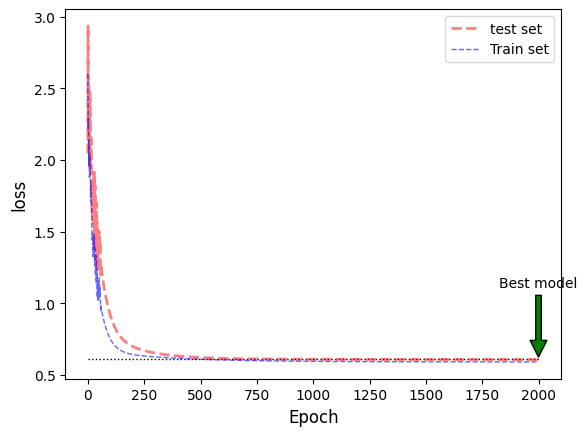

min loss score :  0.61
number of epoch :  1999


In [39]:
sgd_clf_l2 = SGDClassifier(loss='log_loss', penalty = "l2", max_iter=500, random_state = 42, learning_rate= "optimal", early_stopping = False)

n_epochs = 2000
train_loss, test_loss = [], []

for epoch in range(n_epochs):
    sgd_clf_l2.partial_fit(X_train, y_train, classes = np.unique(y_train))
    
    train_pred = sgd_clf_l2.predict_proba(X_train)
    test_pred  = sgd_clf_l2.predict_proba(X_test)
    
    train_loss.append(log_loss(y_train, train_pred))
    test_loss.append(log_loss(y_test, test_pred))

best_epoch = np.argmin(test_loss)
best_test_loss = round(np.sqrt(test_loss[best_epoch]), 2)

plt.annotate('Best model',
             xy=(best_epoch, best_test_loss),
             xytext=(best_epoch, best_test_loss + 0.5),
             ha="center",
             arrowprops=dict(facecolor='green', shrink=0.03),
             fontsize=10,
            )

plt.plot([0, n_epochs], [best_test_loss, best_test_loss], "k:", linewidth=1)
plt.plot(np.sqrt(test_loss),  "r--",  linewidth=2, label="test set",  alpha = 0.5)
plt.plot(np.sqrt(train_loss), "b--", linewidth=1, label="Train set", alpha = 0.6)
plt.legend(loc="upper right", fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("loss",  fontsize=12)
plt.show()

l2_best_epoch = best_epoch

print("min loss score : ", best_test_loss)
print("number of epoch : ", best_epoch)

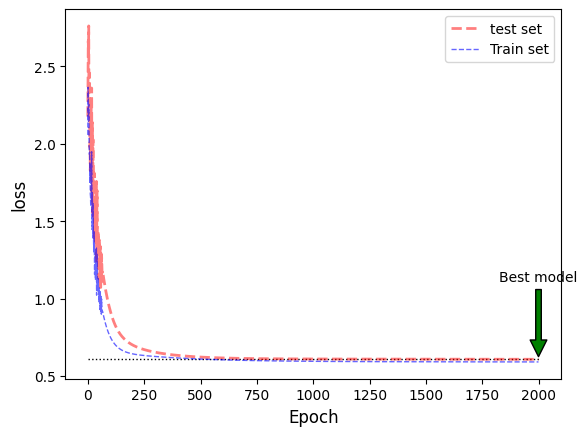

min loss score :  0.61
number of epoch :  1999


In [40]:
sgd_clf_en = SGDClassifier(loss='log_loss', penalty = "elasticnet", max_iter=500, random_state = 42, learning_rate= "optimal", early_stopping = False)

n_epochs = 2000
train_loss, test_loss = [], []

for epoch in range(n_epochs):
    sgd_clf_en.partial_fit(X_train, y_train, classes = np.unique(y_train))
    
    train_pred = sgd_clf_en.predict_proba(X_train)
    test_pred  = sgd_clf_en.predict_proba(X_test)
    
    train_loss.append(log_loss(y_train, train_pred))
    test_loss.append(log_loss(y_test, test_pred))

best_epoch = np.argmin(test_loss)
best_test_loss = round(np.sqrt(test_loss[best_epoch]), 2)

plt.annotate('Best model',
             xy=(best_epoch, best_test_loss),
             xytext=(best_epoch, best_test_loss + 0.5),
             ha="center",
             arrowprops=dict(facecolor='green', shrink=0.03),
             fontsize=10,
            )

plt.plot([0, n_epochs], [best_test_loss, best_test_loss], "k:", linewidth=1)
plt.plot(np.sqrt(test_loss),  "r--",  linewidth=2, label="test set",  alpha = 0.5)
plt.plot(np.sqrt(train_loss), "b--", linewidth=1, label="Train set", alpha = 0.6)
plt.legend(loc="upper right", fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("loss",  fontsize=12)
plt.show()

elasticnet_best_epoch = best_epoch

print("min loss score : ", best_test_loss)
print("number of epoch : ", best_epoch)

### ```Although the graph shows the best model at the 2000th epoch, we do not need that many epochs. Choosing an epoch number between 500 and 750 will be sufficient for model prediction.```
### ```Because after 500 epochs, the slope flattens and progresses horizontally.```

```First, we will try to make predictions using the selected epoch determined by the model.```

In [41]:
for epoch in range(l1_best_epoch):
    sgd_clf_l1.partial_fit(X_train, y_train, classes=np.unique(y_train))

y_test_pred  = sgd_clf_l1.predict(X_test)

print("\n##--l1 Regularization Test Result--##")
print("\nTest Scores")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

########################################################

for epoch in range(l2_best_epoch):
    sgd_clf_l2.partial_fit(X_train, y_train, classes=np.unique(y_train))

y_test_pred  = sgd_clf_l2.predict(X_test)

print("\n##--l2 Regularization Test Result--##")
print("\nTest Scores")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

########################################################

for epoch in range(elasticnet_best_epoch):
    sgd_clf_en.partial_fit(X_train, y_train, classes=np.unique(y_train))

y_test_pred  = sgd_clf_en.predict(X_test)

print("\n##--Elasticnet Regularization Test Result--##")
print("\nTest Scores")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


##--l1 Regularization Test Result--##

Test Scores
Accuracy: 0.8360655737704918
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Confusion Matrix:
 [[24  5]
 [ 5 27]]

##--l2 Regularization Test Result--##

Test Scores
Accuracy: 0.8688524590163934
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:
 [[25  4]
 [ 4 28]]

##--Elasticnet Regularization Test Result--##

Test Scores


### ```Let's try to make predictions using with our epoch numbers```


In [42]:
epochs = 500

for epoch in range(epochs):
    sgd_clf_l1.partial_fit(X_train, y_train, classes=np.unique(y_train))

y_test_pred  = sgd_clf_l1.predict(X_test)

print("\n##--l1 Regularization Test Result--##")
print("\nTest Scores")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

########################################################

for epoch in range(epochs):
    sgd_clf_l2.partial_fit(X_train, y_train, classes=np.unique(y_train))

y_test_pred  = sgd_clf_l2.predict(X_test)

print("\n##--l2 Regularization Test Result--##")
print("\nTest Scores")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

########################################################

for epoch in range(epochs):
    sgd_clf_en.partial_fit(X_train, y_train, classes=np.unique(y_train))

y_test_pred  = sgd_clf_en.predict(X_test)

print("\n##--Elasticnet Regularization Test Result--##")
print("\nTest Scores")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


##--l1 Regularization Test Result--##

Test Scores
Accuracy: 0.8360655737704918
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Confusion Matrix:
 [[24  5]
 [ 5 27]]

##--l2 Regularization Test Result--##

Test Scores
Accuracy: 0.8688524590163934
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:
 [[25  4]
 [ 4 28]]

##--Elasticnet Regularization Test Result--##

Test Scores


### ```It's clear that it looks just a bit different from the 2000-epoch models```
### ```We can select the 500-epoch models to reduce cost```